# Python Statistics Essential training -- Chapter 5

Explanatory variables (x1,x2, ..., xn) as an input <br>
--> Model (with parameters th1, th2 ..., thm) <br>
--> predicted response variable y(x1,x2, ..., xn | th1, th2, ..., thm) as an output <br>
--> Best-fit model (with parameters th1^fit, th2^fit, ..., thm^fit) :: minimize difference for all observed cases over model <br>  parameters

Uses for models
- Reveal facts and trends about population
- Predict future behavior

In [1]:
''' load packages '''
import math
import os

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp
%matplotlib inline

In [4]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
datadir = '../datasets/raw'

## 02 fit model

Loading gapminder data for year 1985 (Live Aid!) and setting up plot as in chapter 3

In [6]:
gapminder = pd.read_csv(os.path.join(datadir,'gapminder.csv'))

In [7]:
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


In [8]:
gdata = gapminder.query('year == 1985')

In [9]:
size = 1e-6 * gdata.population

# Map values of Series according to an input mapping or function.
# Used for substituting each value in a Series with another value, that may be derived from a function, a dict or a Series.
colors = gdata.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

def plotdata():
    gdata.plot.scatter('age5_surviving','babies_per_woman',
                       c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)

In [10]:
print(colors)

50           coral
131           gold
212        skyblue
293        skyblue
374      palegreen
           ...    
14385    palegreen
14466        coral
14547        coral
14628      skyblue
14709      skyblue
Name: region, Length: 182, dtype: object


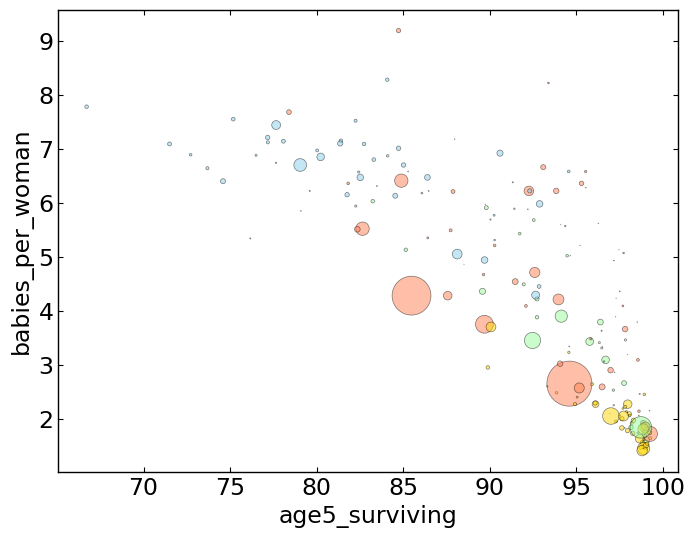

In [11]:
plotdata()

### Ordinary Least Squares
Find th1, th2, ..., thm that minimize sum of squared residuals

![OLS](./figures/OLS.jpg "Ordinary Least Squares")

In [12]:
# ordinary least squares
# tilda formula notation: response variable ~ model term

model = smf.ols(formula='babies_per_woman ~ 1',data=gdata)  # ordinary least squares (model: constant value of 1)

In [13]:
''' equivalent to returning the mean of the response variables '''
grandmean = model.fit()

In [14]:
grandmean

In [15]:
def plotfit(fit):
    plotdata()
    pp.scatter(gdata.age5_surviving,fit.predict(gdata),
               c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')

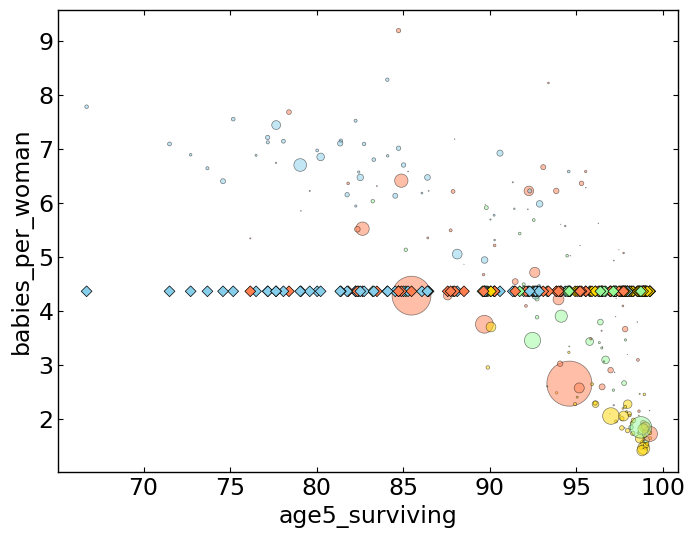

In [16]:
plotfit(grandmean)

In [17]:
grandmean.params

Intercept    4.360714
dtype: float64

The constant term is known as an intercept.

In [18]:
gdata.babies_per_woman.mean()

4.360714285714285

In [19]:
''' introduce the rgion as the model temr, then we get the model equivalent by taking means by group '''

groupmeans = smf.ols(formula='babies_per_woman ~ 1 + region',data=gdata).fit()   # add a model term (plus)

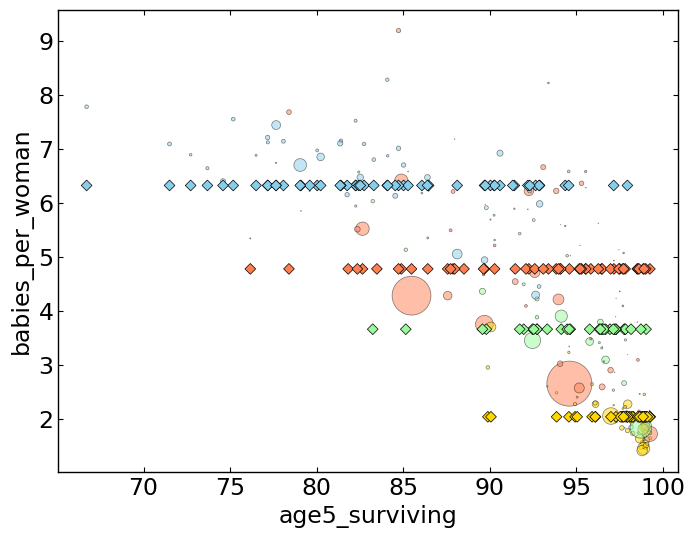

In [20]:
plotfit(groupmeans)

In [21]:
groupmeans.params

Intercept            6.321321
region[T.America]   -2.663139
region[T.Asia]      -1.545744
region[T.Europe]    -4.285639
dtype: float64

In [22]:
''' offsets four groups minus one of them '''
groupmeans = smf.ols(formula='babies_per_woman ~ -1 + region',data=gdata).fit()

In [23]:
groupmeans.params

region[Africa]     6.321321
region[America]    3.658182
region[Asia]       4.775577
region[Europe]     2.035682
dtype: float64

In [24]:
gdata.groupby('region').babies_per_woman.mean()

region
Africa     6.321321
America    3.658182
Asia       4.775577
Europe     2.035682
Name: babies_per_woman, dtype: float64

In [25]:
''' add quantitative variable, child survival as a main term in the model '''
surviving = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving',data=gdata).fit()

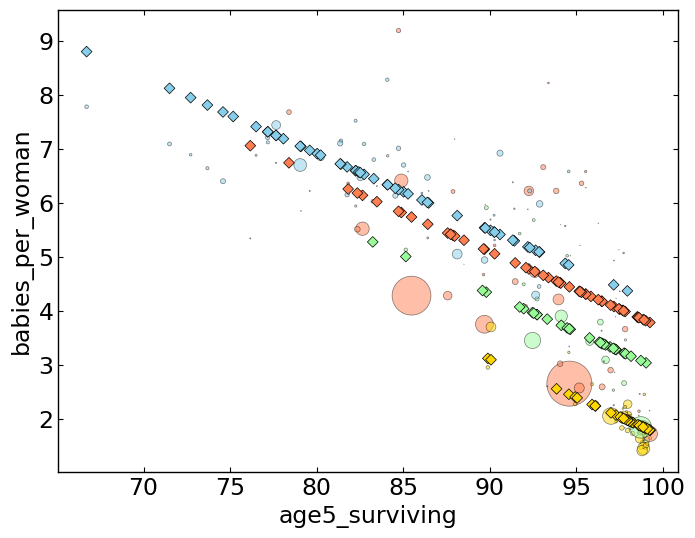

In [26]:
plotfit(surviving)

In [27]:
surviving.params

region[Africa]     18.265792
region[America]    17.085884
region[Asia]       17.864741
region[Europe]     15.872183
age5_surviving     -0.141886
dtype: float64

Here, age5_surviving:: the slope!

In [28]:
''' interaction term with : '''
surviving_byregion = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving:region',data=gdata).fit()

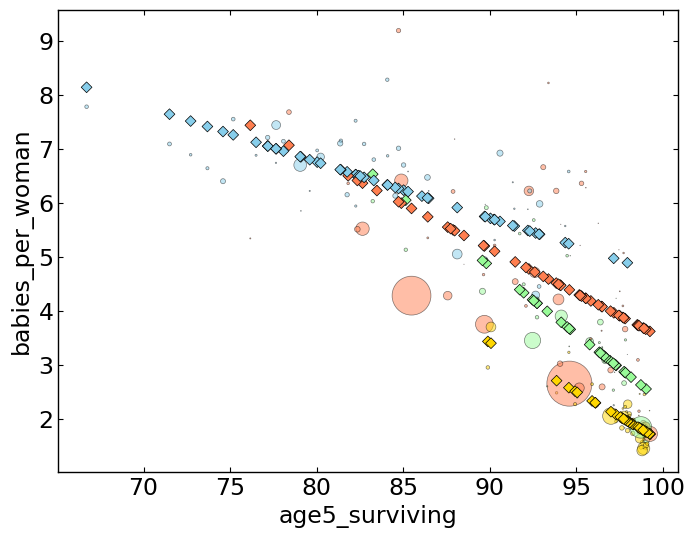

In [29]:
plotfit(surviving_byregion)

In [30]:
surviving_byregion.params

region[Africa]                    15.080914
region[America]                   27.506243
region[Asia]                      20.032483
region[Europe]                    19.884446
age5_surviving:region[Africa]     -0.104053
age5_surviving:region[America]    -0.251994
age5_surviving:region[Asia]       -0.165384
age5_surviving:region[Europe]     -0.183029
dtype: float64

In [31]:
''' add the population as a main fit model '''
surviving_byregion_population = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving:region + population',data=gdata).fit()

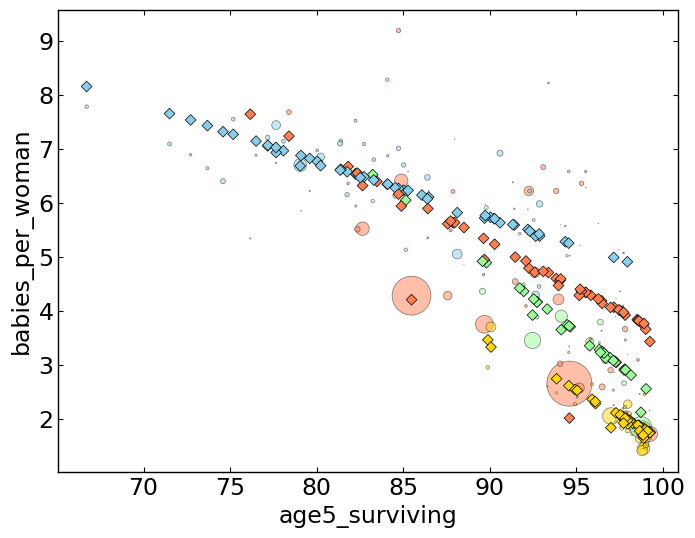

In [32]:
plotfit(surviving_byregion_population)

## 03 fit goodness

In [33]:
gapminder = pd.read_csv(os.path.join(datadir,'gapminder.csv'))

In [34]:
gdata = gapminder.query('year == 1985')

In [35]:
size = 1e-6 * gdata.population

colors = gdata.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

def plotdata():
    gdata.plot.scatter('age5_surviving','babies_per_woman',
                      c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)

Setting up model plot

In [36]:
def plotfit(fit):
    plotdata()
    pp.scatter(gdata.age5_surviving,fit.predict(gdata),
               c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')

Three models from last video

In [37]:
groupmeans = smf.ols(formula='babies_per_woman ~ -1 + region', data=gdata).fit()

In [38]:
surviving = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving', data=gdata).fit()

In [39]:
surviving_byregion_population = smf.ols(
    formula='babies_per_woman ~ -1 + region + age5_surviving'
            '+ age5_surviving:region - age5_surviving + population',
    data=gdata).fit()

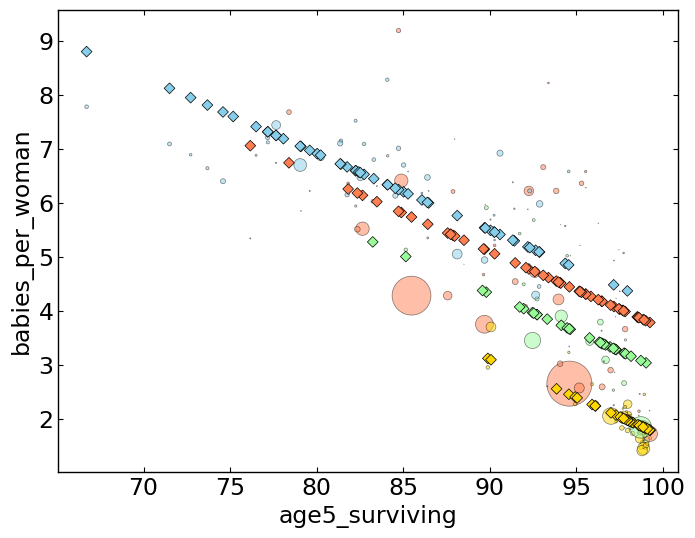

In [40]:
plotfit(surviving)

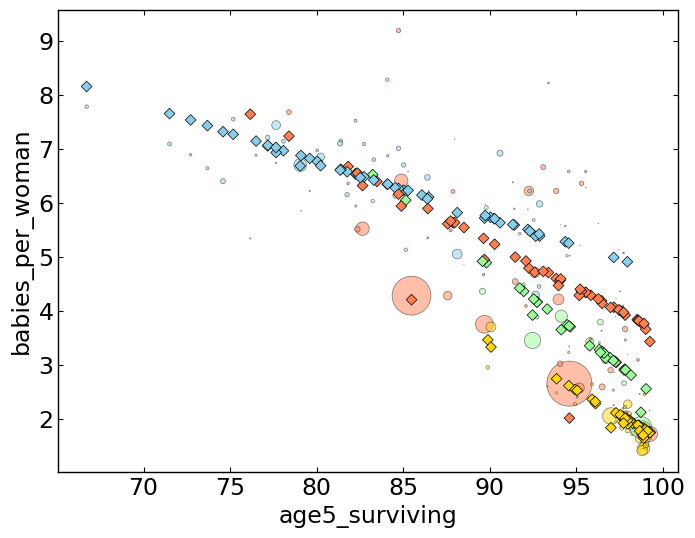

In [41]:
plotfit(surviving_byregion_population)

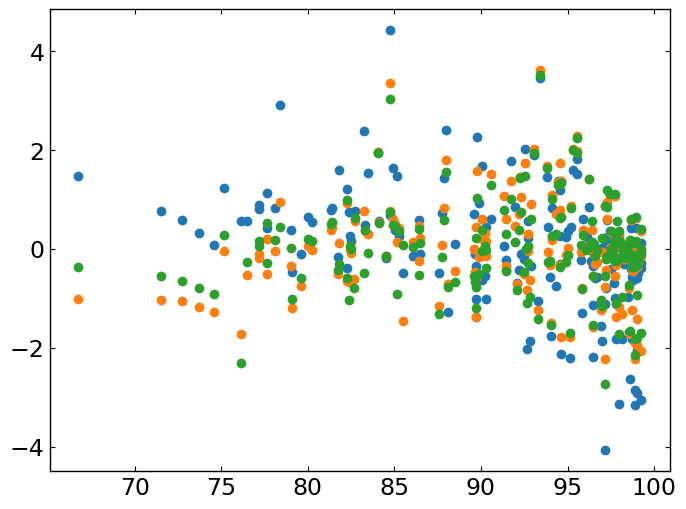

In [42]:
''' goodness of fit: check actual residuals '''
pp.scatter(gdata.age5_surviving,groupmeans.resid)
pp.scatter(gdata.age5_surviving,surviving.resid)
pp.scatter(gdata.age5_surviving,surviving_byregion_population.resid)

![Goodness](./figures/Goodness.jpg)

***F statstic**: 
- takes into account not only the explained and unexplained variance, but the number of model parameters. 
- too many parameters will overfit the data, conforming to the vagaries of the observations, but losing predictive power. 
- measures how much, on average, each parameter contributes to the growth of the R², compared to a random model vector, that is, the hypothetical explanatory variable that has random values, and no link to the response variable at all. 
- An F of 1 means that the parameter contributes the same as a random vector. 
- A large F, that the parameters explains much more than that.

In [43]:
''' print out mean square residuals '''
for model in [groupmeans,surviving,surviving_byregion_population]:
    print(model.mse_resid)

1.4979520263709156
0.9423025333008324
0.8480227300570319


In [44]:
''' R-squred error: 0 to 1 '''
for model in [groupmeans,surviving,surviving_byregion_population]:
    print(model.rsquared)

0.6364676965596588
0.7726009080146058
0.7999775707885217


In [45]:
for model in [groupmeans,surviving,surviving_byregion_population]:
    print(model.fvalue)

103.88003937611684
150.34180603430977
86.4878755672519


In [46]:
surviving.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       babies_per_woman   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     150.3
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           8.26e-56
Time:                        02:55:11   Log-Likelihood:                -250.30
No. Observations:                 182   AIC:                             510.6
Df Residuals:                     177   BIC:                             526.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
region[Africa]     18.2658      1.168     15.639      0.000      15.961      20.571
region[America]    17.0859      1.315     12.990      0.000      14.490      19.682
region[Asia]       17.8647      1.279     13.971      0.000      15.341      20.388
region[Europe]     15.8722      1.352     11.739      0.000      13.204      18.541
age5_surviving     -0.1419      0.014    -10.294      0.000      -0.169      -0.115
==============================================================================
Omnibus:                       13.021   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.362
Skew:                           0.443   Prob(JB):                     0.000103
Kurtosis:                       4.279   Cond. No.                     3.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
""" check the goodness: ANOVA table (ANalysis Of VAriance) """

sm.stats.anova_lm(groupmeans)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,655.512121,2.604302e-105
Residual,178.0,266.635461,1.497952,NaN,NaN


In [48]:
sm.stats.anova_lm(surviving)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,1042.049316,8.236854e-122
age5_surviving,1.0,99.847912,99.847912,105.961630,9.003514e-20
Residual,177.0,166.787548,0.942303,NaN,NaN


In [49]:
sm.stats.anova_lm(surviving_byregion_population)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,1157.900225,1.132132e-123
age5_surviving:region,4.0,110.113541,27.528385,32.461848,3.514845e-20
population,1.0,9.813987,9.813987,11.572788,8.313090e-04
Residual,173.0,146.707932,0.848023,NaN,NaN


## 04 cross validation

![CrossValidation](./figures/CrossValidation.jpg)

In [50]:
gapminder = pd.read_csv(os.path.join(datadir,'gapminder.csv'))

In [51]:
gdata = gapminder.query('year == 1985')

Refactored plotting so that it works on arbitrary datasets.

In [52]:
def sc(data):
    return 1e-6 * data.population, data.region.map({'Africa': 'skyblue', 'Europe': 'gold',
                                                   'America': 'palegreen', 'Asia': 'coral'})

def plotdata(data=gdata):
    size, colors = sc(data)
    data.plot.scatter('age5_surviving','babies_per_woman',
                      c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)
                      
def plotfit(fit,data=gdata): 
    plotdata(data)

    size, colors = sc(data)
    pp.scatter(data.age5_surviving,fit.predict(data),
               c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')

Model formulas from the last two videos

In [53]:
f_groupmeans = 'babies_per_woman ~ -1 + region'
f_surviving = 'babies_per_woman ~ -1 + region + age5_surviving'
f_srp = ('babies_per_woman ~ -1 + region + age5_surviving'
         '+ age5_surviving:region - age5_surviving + population')

In [54]:
''' shuffle the data '''
shuffled = gdata.sample(len(gdata))

In [55]:
''' dividing training / testing dataset '''
training, testing = shuffled.iloc[:len(gdata)//2], shuffled.iloc[len(gdata)//2:]

In [56]:
surviving = smf.ols(f_surviving, data=training).fit()

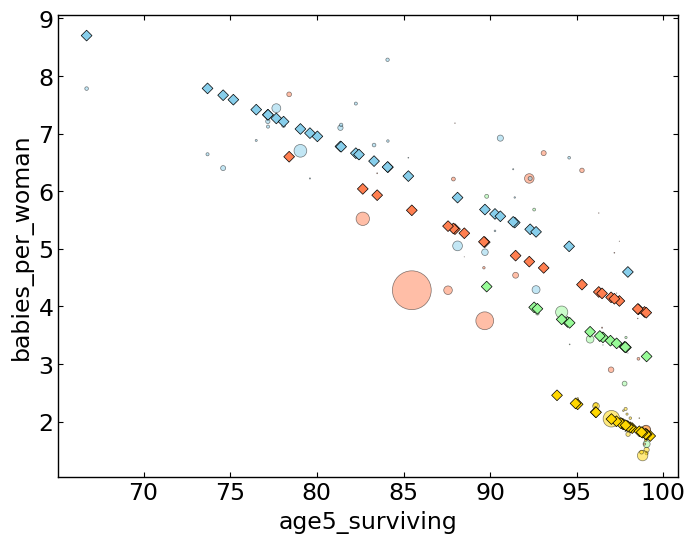

In [57]:
plotfit(surviving,training)

In [58]:
surviving.mse_resid

0.8408637804949733

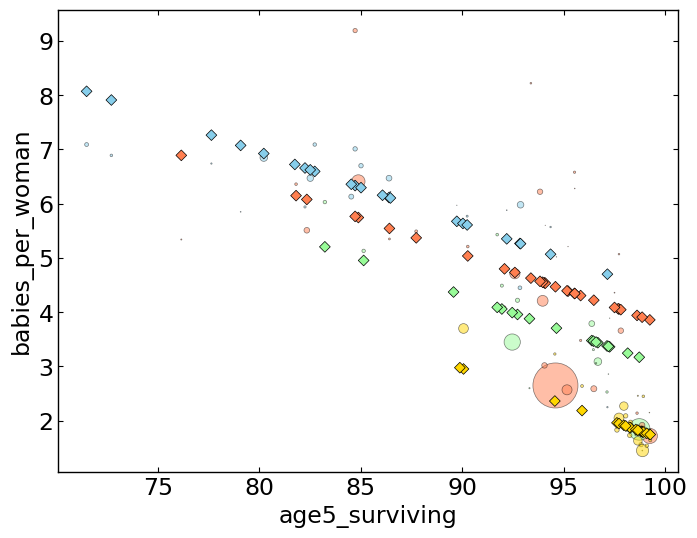

In [59]:
plotfit(surviving,testing)

In [60]:
resid = surviving.predict(testing) - testing.babies_per_woman
df = len(testing) - surviving.df_model - 1    # degrees of freedom
np.sum(resid**2) / df     

1.1120314381392895

In [61]:
''' automate the process above '''
def cross_validate(data,formula,response,n=100):
    ret = []
    
    for i in range(n):
        shuffled = data.sample(len(data))
        
        training, testing = shuffled.iloc[:len(data)//2], shuffled.iloc[len(data)//2:]
        
        trained = smf.ols(formula, data=training).fit()
        
        resid = trained.predict(testing) - testing[response]
        df = len(testing) - trained.df_model - 1
        mse = np.sum(resid**2) / df
        
        ret.append(mse)
    
    return np.mean(ret)

In [62]:
cross_validate(gdata,f_groupmeans,'babies_per_woman')

1.603517511379122

In [63]:
cross_validate(gdata,f_surviving,'babies_per_woman')

1.062401163829308

In [64]:
cross_validate(gdata,f_srp,'babies_per_woman')

1.2284588473651867

**Note**: Sweet spot is the intermediate complex model. 

## 05 logistic Regression

In [65]:
# fix error in some versions of statsmodels
import scipy
if not hasattr(scipy.stats,'chisqprob'):
    scipy.stats.chisqprob = lambda chisq, df: scipy.stats.chi2.sf(chisq, df)

In [66]:
smoking = pd.read_csv(os.path.join(datadir,"whickham.csv"))

In [67]:
smoking.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [68]:
smoking = smoking[smoking.age < 65]

In [69]:
# allocare color from smoker parameter
color = np.where(smoking.smoker == 'No','skyblue','coral')

jitter = 0.05*(np.random.rand(len(smoking)) - 0.5)
def plotfit(fit):
    pp.scatter(smoking.age,smoking.outcome + jitter,c=color,linewidth=0.2,edgecolor='k',alpha=0.5)
    pp.scatter(smoking.age,fit.predict(smoking),c=color,linewidth=0.2,edgecolor='gray',marker='d')

In [70]:
# python trick: multiply integer x boolean = integer
smoking['outcome'] = 1*(smoking['outcome'] == 'Alive')

In [71]:
ols_group_age = smf.ols('outcome ~ smoker + age',data=smoking).fit()

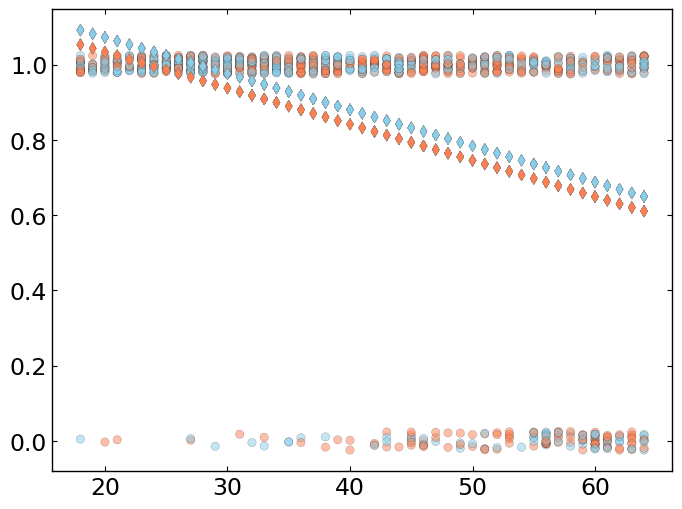

In [72]:
plotfit(ols_group_age)

In [73]:
ols_group_age.params

Intercept        1.264665
smoker[T.Yes]   -0.038738
age             -0.009615
dtype: float64

In [74]:
sm.stats.anova_lm(ols_group_age)

,df,sum_sq,mean_sq,F,PR(>F)
smoker,1.0,0.899981,0.899981,8.181417,4.314608e-03
age,1.0,17.713821,17.713821,161.030213,1.806638e-34
Residual,1068.0,117.483303,0.110003,NaN,NaN


In [75]:
ols_group_age.conf_int()

,0,1
Intercept,1.198828,1.330503
smoker[T.Yes],-0.078622,0.001146
age,-0.011102,-0.008129


**Note:: Some predicted outcomes is larger than one -> problematic**

To avoid the overshot:
Use **Logistic Regression**

![Logistic](./figures/Logistic.jpg)

The criteria for logistic regression is not minimizing the mean-square error of the residuals. But rather interpreting the model response as a probability function and maximizing the resulting probability of the observed data. This is a form of maximum-likelihood estimation. So instead of the main square error the simplest way to characterize goodness of fit is the value of the likelihood.

In [76]:
logit_smoker_age = smf.logit('outcome ~ smoker + age',data=smoking).fit()

Optimization terminated successfully.
         Current function value: 0.346766
         Iterations 7


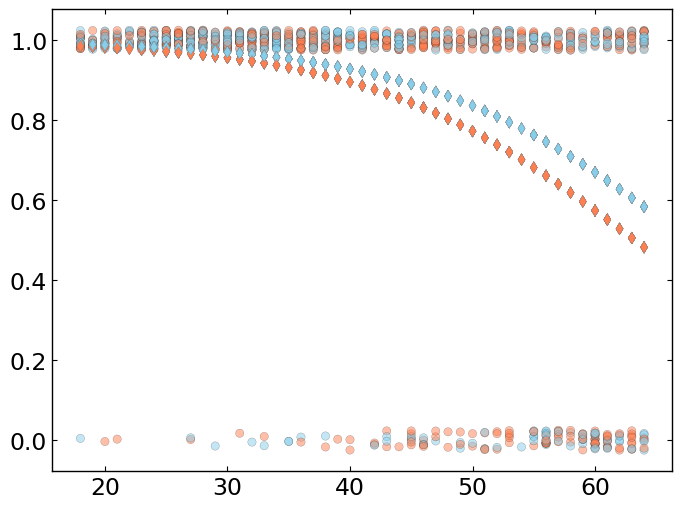

In [77]:
plotfit(logit_smoker_age)

In [78]:
''' print out likelyhood '''
logit_smoker_age.llf

-371.38650786619064

In [79]:
logit_smoker_age.params

Intercept        6.250847
smoker[T.Yes]   -0.408103
age             -0.092403
dtype: float64

In [80]:
logit_smoker_age.conf_int()

,0,1
Intercept,5.331126,7.170568
smoker[T.Yes],-0.777754,-0.038451
age,-0.109478,-0.075327


In [81]:
logit_smoker_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                 1071
Model:                          Logit   Df Residuals:                     1068
Method:                           MLE   Df Model:                            2
Date:                Fri, 29 Jul 2022   Pseudo R-squ.:                  0.1776
Time:                        02:55:15   Log-Likelihood:                -371.39
converged:                       True   LL-Null:                       -451.59
Covariance Type:            nonrobust   LLR p-value:                 1.469e-35
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.2508      0.469     13.321      0.000       5.331       7.171
smoker[T.Yes]    -0.4081      0.189     -2.164      0.030      -0.778      -0.038
age              -0.0924      0.009    -10.606      0.000      -0.109      -0.075
=================================================================================
"""

## 06 Bayesian Inference

- We do not make **estimates** of population parameters from the data
- Rather, we maintain **probability distributions** for population distributions, which represent our quantitative belief about their value
- We start with probability **priors**, and we use **observations** to update them to probability **posteriors**

![Bayesian](./figures/Bayesian.jpg)

In [88]:
import pymc3 as pm

In [92]:
''' flipping coin problem '''
n = 100  # number of turn
k = 61   # observation of head

with pm.Model() as coin_context:
    p = pm.Uniform('p',0.40,0.80)   # uniform model: 40 / 80 %
    
    y = pm.Binomial('y',n=n,p=p,observed=k)  # Binomial distribution
    
    #trace = pm.sample(10000)
    trace = pm.sample(10000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


/Users/astrodoo/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/astrodoo/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/astrodoo/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/astrodoo/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 26 seconds.


In [93]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.608,0.048,0.515,0.697,0.0,0.0,15452.0,23563.0,1.0


array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

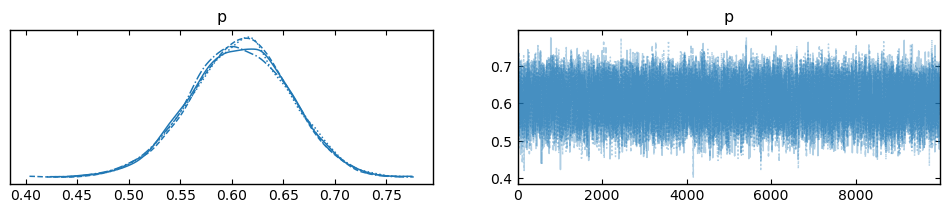

In [94]:
#pm.traceplot(trace)
pm.plot_trace(trace)

In [95]:
gdata=pd.read_csv(os.path.join(datadir,'gapminder.csv')).query('year == 1985')

In [96]:
gdata.sort_values('age5_surviving',inplace=True)

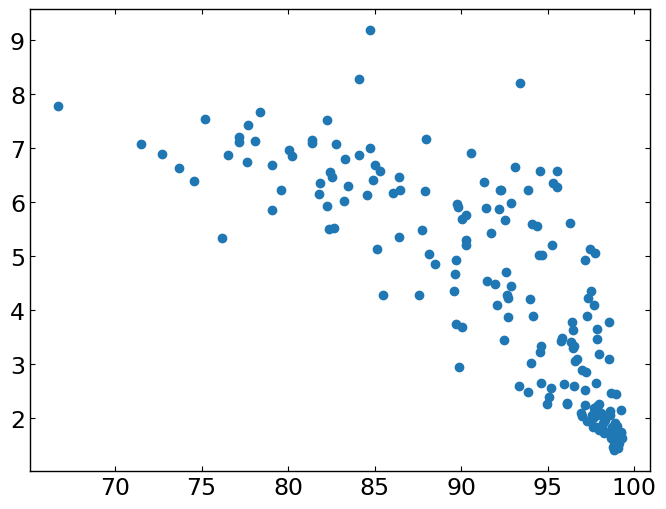

In [97]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])

In [123]:
with pm.Model() as gapminder_context:
    #model
    intercept = pm.Uniform('intercept',5,15)
    slope = pm.Uniform('slope',-1,1)
    
    # observations
    babies = pm.Normal('babies',
                       mu = intercept + slope * (gdata['age5_surviving'] - 65),   # center
                       sd = 1,
                       observed = gdata['babies_per_woman'])
    
    #trace = pm.sample(10000)
    trace = pm.sample(10000, return_inferencedata=False) # updated pm3 raise warning below several procedures

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept]


/Users/astrodoo/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/astrodoo/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/astrodoo/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 34 seconds.
The acceptance probability does not match the target. It is 0.8876350906860444, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


In [124]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/astrodoo/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,10.191,0.289,9.656,10.738,0.004,0.003,6264.0,7671.0,1.0
slope,-0.219,0.010,-0.239,-0.200,0.000,0.000,6252.0,7824.0,1.0


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/astrodoo/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'intercept'}>,
        <AxesSubplot:title={'center':'intercept'}>],
       [<AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'slope'}>]], dtype=object)

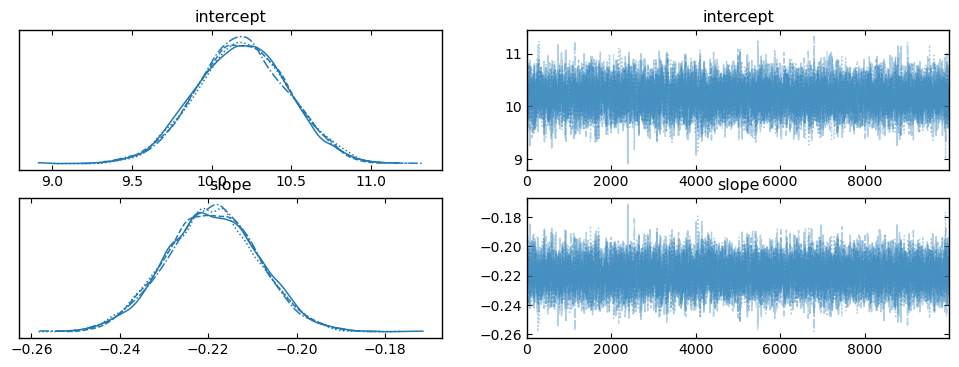

In [125]:
#pm.traceplot(trace)
pm.plot_trace(trace)

In [126]:
babies = trace['intercept'].mean() + trace['slope'].mean() * (gdata['age5_surviving'] - 65)
#babies = trace['posterior']['intercept'].mean() \
#        + trace['posterior']['slope'].mean() * (gdata['age5_surviving'] - 65)

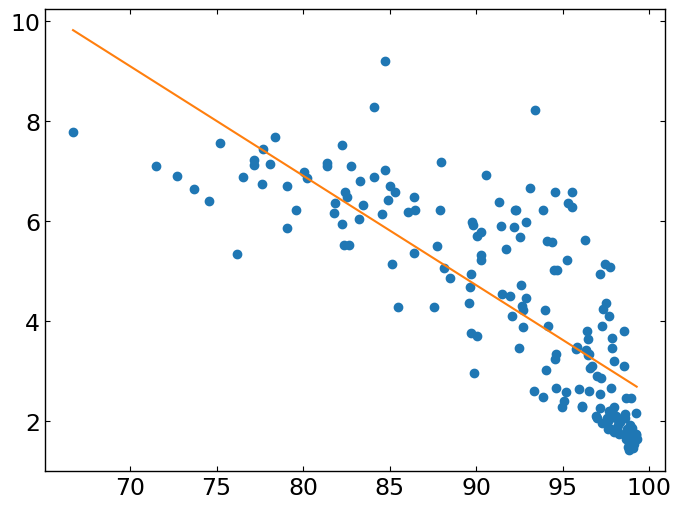

In [128]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])
pp.plot(gdata['age5_surviving'],babies,'C1')

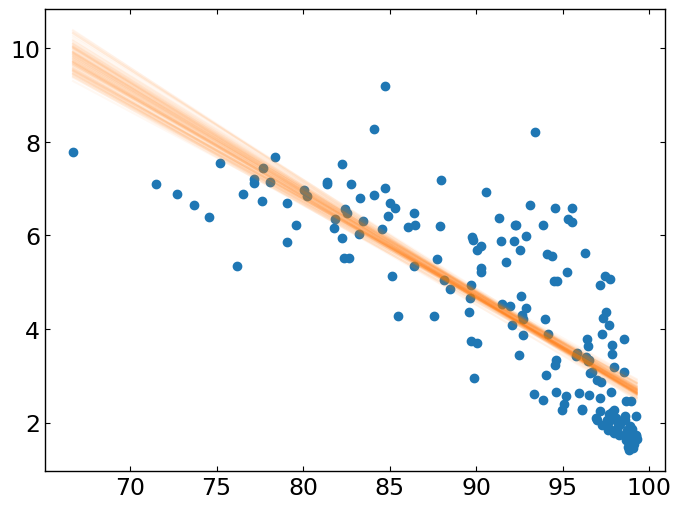

In [129]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])

for i, intercept, slope in zip(range(100),trace['intercept'][::50],trace['slope'][::50]):
    babies = intercept + slope * (gdata['age5_surviving'] - 65)
    pp.plot(gdata['age5_surviving'],babies,'C1',alpha=0.05)

## 07 Challenge solution

Loading gapminder data for year 1985 (Live Aid!).

In [130]:
gapminder = pd.read_csv(os.path.join(datadir,'gapminder.csv'))

In [131]:
gdata = gapminder.query('year == 1985')

Refactored plotting so that it works on arbitrary datasets.

In [132]:
def sc(data):
    return 1e-6 * data.population, data.region.map({'Africa': 'skyblue', 'Europe': 'gold',
                                                   'America': 'palegreen', 'Asia': 'coral'})

def plotdata(data=gdata):
    size, colors = sc(data)
    data.plot.scatter('age5_surviving','babies_per_woman',
                      c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)
                      
def plotfit(fit,data=gdata):
    plotdata(data)

    size, colors = sc(data)
    pp.scatter(data.age5_surviving,fit.predict(data),
               c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')

Our cross-validation function

In [133]:
# we'll make a function that is generic in terms of formula and response variable
def cross_validate(data,formula,response,n=100):
    ret = []
    
    for i in range(n):
        shuffled = data.sample(len(data))
        
        training = shuffled.iloc[:len(data)//2]
        testing = shuffled.iloc[len(data)//2:]
        
        trained = smf.ols(formula,data=training).fit()
        
        resid = trained.predict(testing) - testing[response]
        df = len(testing) - trained.df_model - 1
        mse = np.sum(resid**2) / df
    
        ret.append(mse)
    
    return np.mean(ret)

The best model formula we've found

In [134]:
f_surviving = 'babies_per_woman ~ -1 + region + age5_surviving'

1.03887973675005

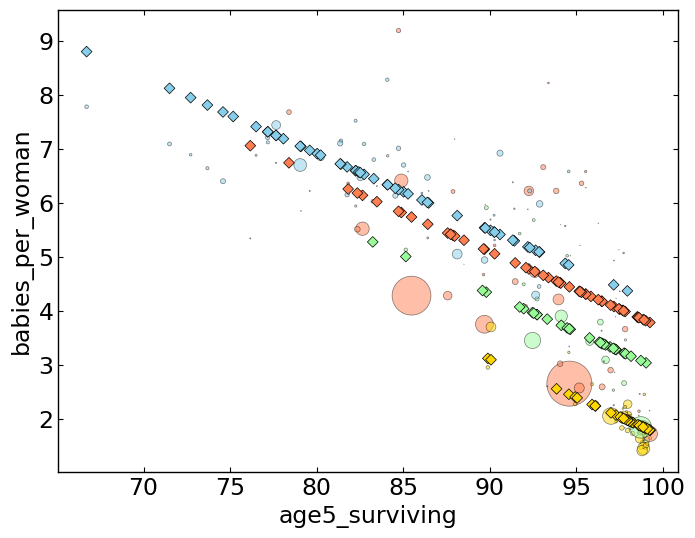

In [135]:
fit = smf.ols(f_surviving,gdata).fit()
plotfit(fit,gdata)
cross_validate(gdata,f_surviving,'babies_per_woman')

0.9248124299813177

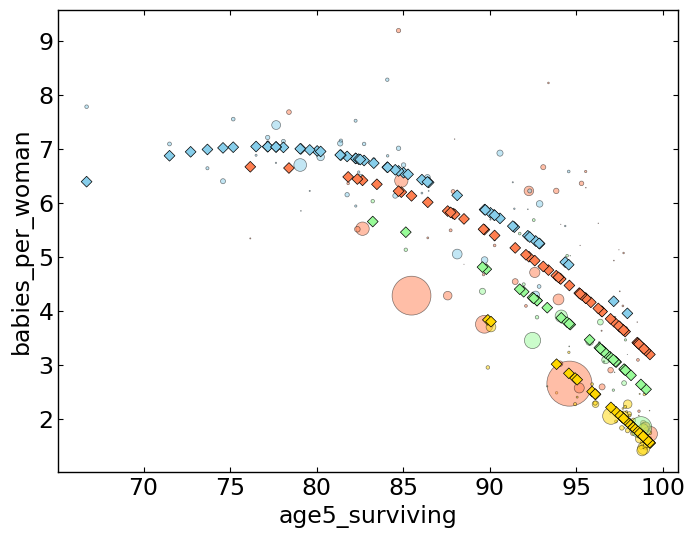

In [136]:
formula = 'babies_per_woman ~ -1 + region + age5_surviving + pow(age5_surviving,2)'
fit = smf.ols(formula,gdata).fit()
plotfit(fit,gdata)
cross_validate(gdata,formula,'babies_per_woman')

In [137]:
gdata['age5_surviving2'] = gdata.age5_surviving**2

/var/folders/zd/ndrhnvl55pj0375gxt18wyzc0000gn/T/ipykernel_5262/1700163264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdata['age5_surviving2'] = gdata.age5_surviving**2
